<div
    style='background-image: url("assets/header.png"); padding: 0px;
           background-size: cover; border-radius: 10px; height: 250px;
           background-position: 50% 50%'
     >
    <div
        style="margin: auto; position: relative; top: 10px;
               background: rgba(255 , 255 , 255 , 0.2);
               width: 85%; height: 80px;
               border-radius: 10px"
         >
        <div
            style="position: relative; top: 50%;
                   transform: translatey(-50%)">
            <div
                style="font-size: xx-large; font-weight: 900;
                       text-align: center;
                       color: rgba(0 , 0 , 0 , 1);
                       line-height: 100%"
                 >
                Hands-on session | Data standards
            </div>
            <div
                style="font-size: large; padding-top: 20px;
                       text-align: center;
                       color: rgba(0 , 0 , 0 , 1)"
                 >
                Chairs: <em>Matteo Di Giovanni (GSSI) &
                Shahar Shani-Kadmiel (KNMI)</em>
            </div>
        </div>
    </div>
</div>
<div
     style="text-align: right; font-size: 10px"
     >
    <em>Photo by Shahar Shani-Kadmiel, November 7, 2021</em>
    </div>

# Data standards and formats

Data standards are the guidelines by which data are described and recorded. In order to share, exchange, combine and understand data, we must standardize the format as well as the meaning.

## Why do we need Data Standards?

Standards make it easier to create, share, and integrate data by ensuring that the data are represented and interpreted correctly. Standards also reduce the time spent cleaning and translating data. Cleansing “dirty data” is a common barrier encountered by scientists, taking 26% of data scientists’ on-the-job time (Anaconda, 2020). For example, when integrating datasets from different sources, each of which used a different format for their date variable (e.g., April 2, 2024, 04-02-24, 04/02/2024), it would be a time consuming task to interpret and convert the dates into a common format before integrating the data.

## Types of data:

### Seismic

Outside the oil & gas industry where *SEGY/D/X* are common, raw, unprocessed waveforms should be archived as *MiniSEED* files in an *SeisComP Data Structure (SDS)* along with per station metadata in *StationXML* files.

#### The directory and file layout of SDS is defined as:

```
<SDSdir>/YEAR/NET/STA/CHAN.TYPE/NET.STA.LOC.CHAN.TYPE.YEAR.DAY
<------- path to file -------->|<-------- mseed file -------->
```

These fields are defined by SDS as follows:

```
SDSdir :  arbitrary base directory
YEAR   :  4 digit year
NET    :  Network code/identifier, up to 8 characters, no spaces
STA    :  Station code/identifier, up to 8 characters, no spaces
CHAN   :  Channel code/identifier, up to 8 characters, no spaces
TYPE   :  1 characters indicating the data type, recommended types are:
           'D' - Waveform data
           'E' - Detection data
           'L' - Log data
           'T' - Timing data
           'C' - Calibration data
           'R' - Response data
           'O' - Opaque data
LOC    :  Location identifier, up to 8 characters, no spaces
DAY    :  3 digit day of year, padded with zeros
```

#### MiniSEED

*MiniSEED*, often referred to as [*MSEED*](https://ds.iris.edu/ds/nodes/dmc/data/formats/miniseed/), is a stripped down version of [*SEED*](https://ds.iris.edu/ds/nodes/dmc/data/formats/seed/) containing only waveform data. There is no station and channel metadata included. When the data samples in the file are integers, the files can be written with *STEIM2* compression providing small file size and efficient IO with (de)compression on the fly.

#### StationXML

[*StationXML*](http://docs.fdsn.org/projects/stationxml/en/latest/) is an XML representation of metadata that describes the data collected by geophysical instrumentation. *StationXML* was developed through the [International Federation of Digital Seismograph Networks (FDSN)](https://www.fdsn.org/) to provide a standardized format for geophysical metadata.

####  Example

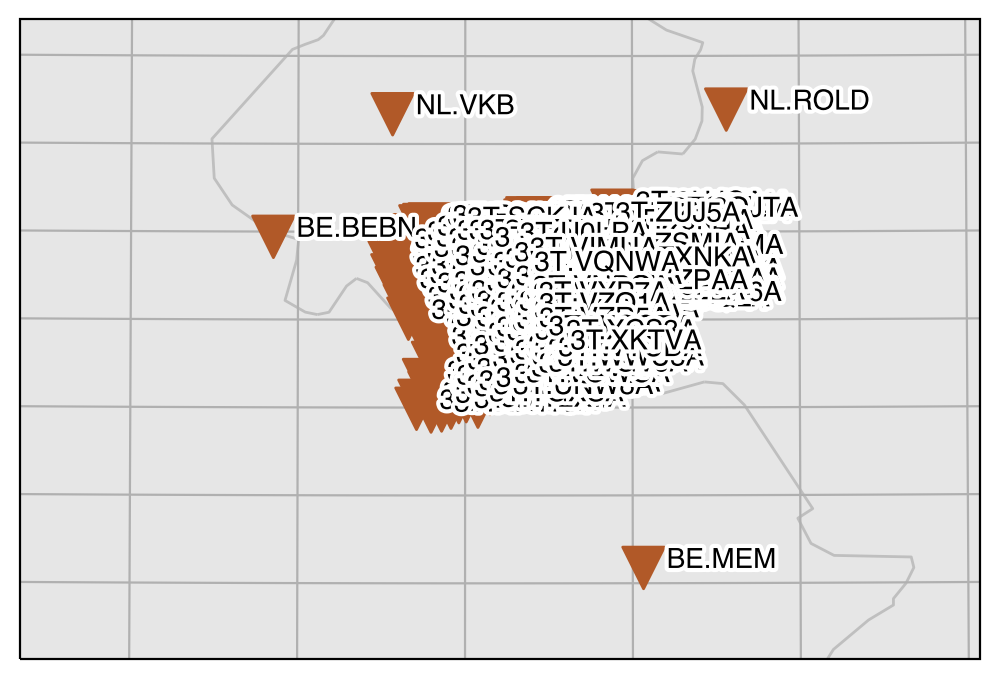

In [1]:
from obspy import UTCDateTime
from obspy.clients.fdsn import Client

client = Client('ORFEUS')

inventory = client.get_stations(
    starttime=UTCDateTime('2020-01-01'),
    endtime=UTCDateTime(),
    network='*',
    station='*',
    location='*',
    channel='??N,??E,??Z,??1,??2',
    minlongitude=5.5,
    maxlongitude=6.2,
    minlatitude=50.6,
    maxlatitude=50.9,
    level='channel'
)
inventory.plot('local');

In [15]:
inventory.networks

[Network NL (Netherlands Seismic and Acoustic Network)
	Station Count: None/None (Selected/Total)
	1993-01-01T00:00:00.000000Z - --
	Access: open
	Contains:
		Stations (5):
			NL.HGN (HEIMANSGROEVE, NETHERLANDS)
			NL.MAME (Mamelis)
			NL.ROLD (Rolduc)
			NL.TERZ (Terziet)
			NL.VKB (Valkenburg, Netherlands)
		Channels (46):
			NL.HGN.02.AX1, NL.HGN.02.AX2, NL.HGN.02.BHZ, NL.HGN.02.BHN, 
			NL.HGN.02.BHE, NL.HGN.02.LCE, NL.MAME..AX1, NL.MAME..AX2, 
			NL.MAME..BHZ, NL.MAME..BHN, NL.MAME..BHE, NL.MAME..LCE, 
			NL.ROLD..BHZ, NL.ROLD..BHN, NL.ROLD..BHE, NL.ROLD..LCE, 
			NL.TERZ.00.BHZ, NL.TERZ.00.BHN, NL.TERZ.00.BHE, NL.TERZ.00.HHZ, 
			NL.TERZ.00.HHN, NL.TERZ.00.HHE, NL.TERZ.01.AX1, NL.TERZ.01.AX2, 
			NL.TERZ.01.BHZ, NL.TERZ.01.BH1, NL.TERZ.01.BH2, NL.TERZ.01.HHZ, 
			NL.TERZ.01.HH1, NL.TERZ.01.HH2, NL.TERZ.01.LCE, NL.TERZ.01.LHZ, 
			NL.TERZ.01.LH1, NL.TERZ.01.LH2, NL.VKB..AX1, NL.VKB..AX2, 
			NL.VKB..BHZ, NL.VKB..BHN, NL.VKB..BHE, NL.VKB..HHZ, NL.VKB..HHN, 
			NL.VKB..HHE, NL.VKB..

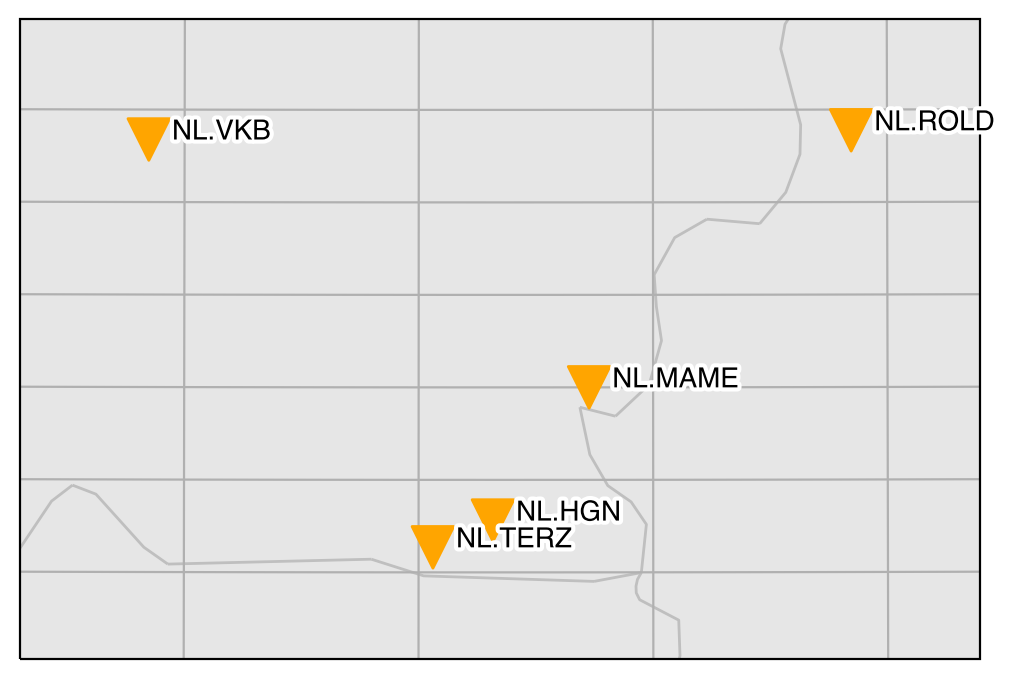

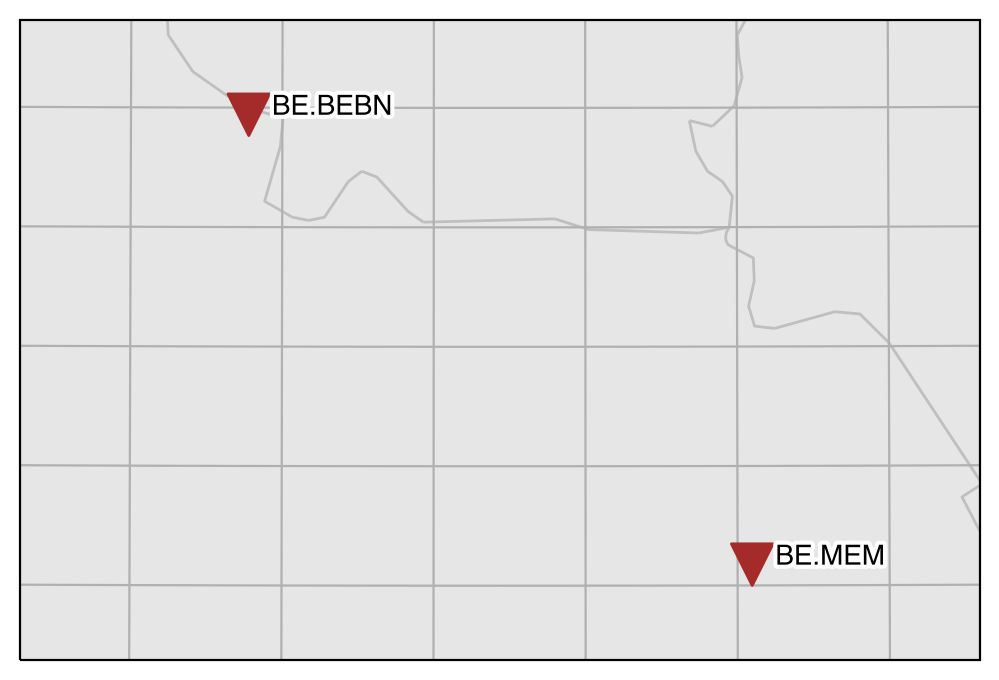

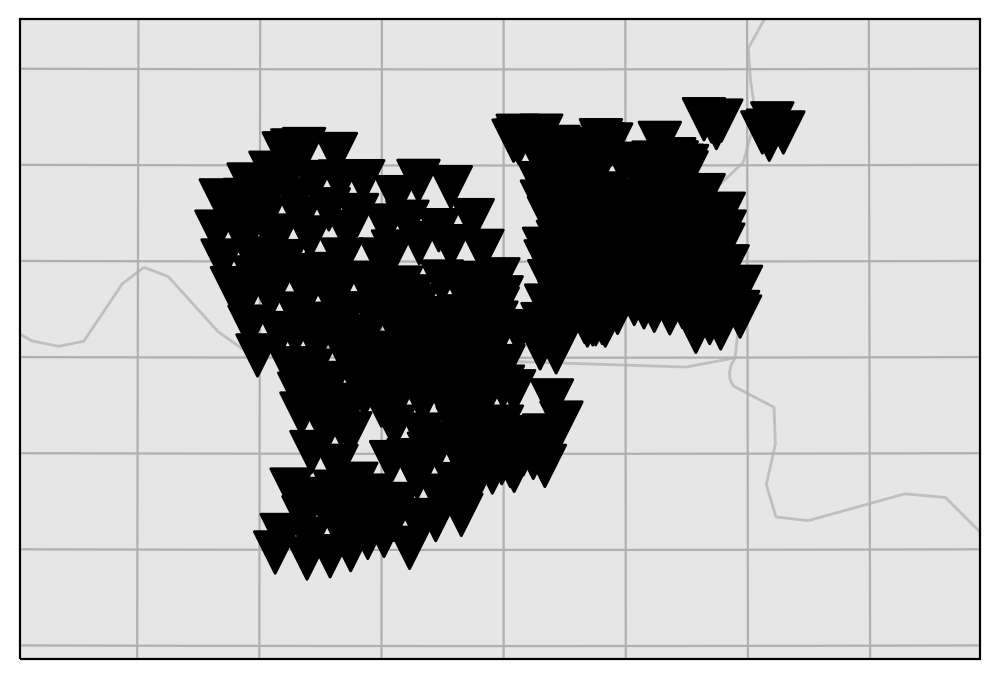

In [21]:
inventory.select(network='NL').plot('local', color='orange');
inventory.select(network='BE').plot('local', color='brown');
inventory.select(network='3T').plot('local', color='k', label=False);

Channel 'BHZ', Location '00' 
	Time range: 2019-06-03T00:00:00.000000Z - --
	Latitude: 50.76, Longitude: 5.91, Elevation: 150.0 m, Local Depth: 0.0 m
	Azimuth: 0.00 degrees from north, clockwise
	Dip: -90.00 degrees down from horizontal
	Sampling Rate: 40.00 Hz
	Sensor (Description): Nanometrics Trillium 240, generation 2, 240 s, 1189 V/m/s (Trillium 240)
	Response information available
Channel 'BHZ', Location '01' 
	Time range: 2019-06-19T00:00:00.000000Z - --
	Latitude: 50.76, Longitude: 5.91, Elevation: 150.0 m, Local Depth: 250.0 m
	Azimuth: 0.00 degrees from north, clockwise
	Dip: -90.00 degrees down from horizontal
	Sampling Rate: 40.00 Hz
	Sensor (Description): Streckeisen STS-5A (STS-5A)
	Response information available


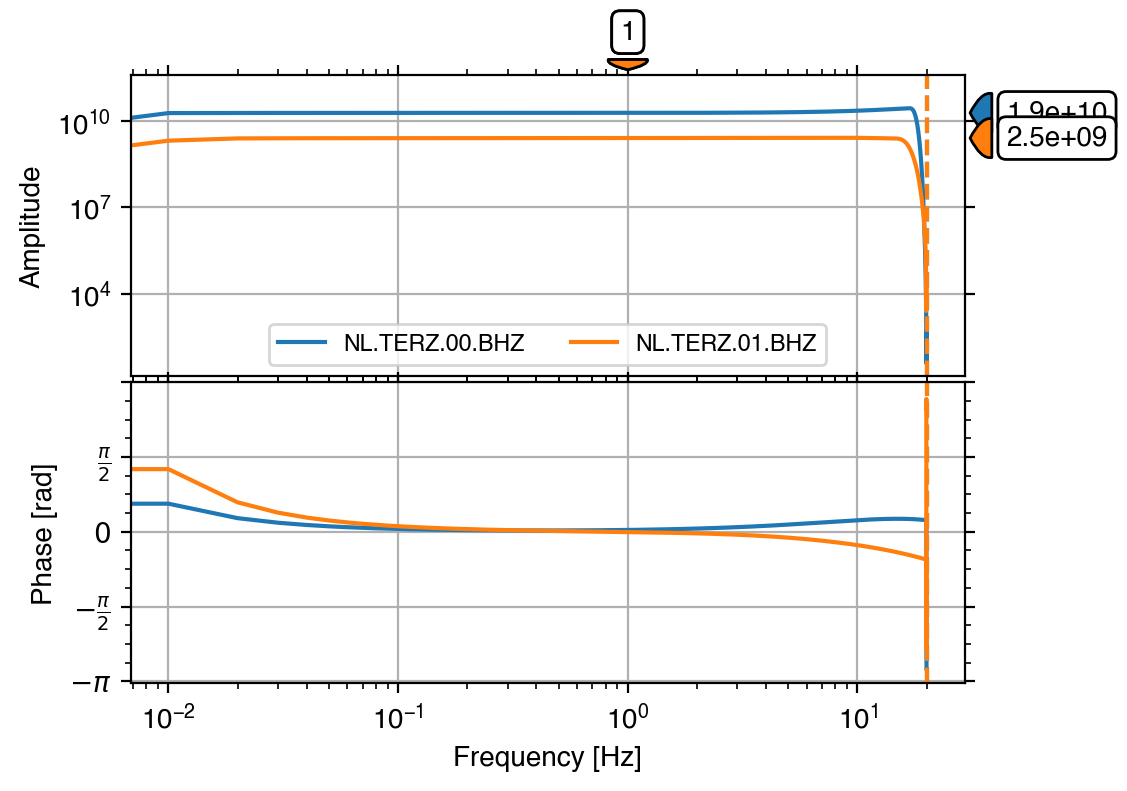

In [2]:
inventory = client.get_stations(
    starttime=UTCDateTime('2020-01-01'),
    endtime=UTCDateTime(),
    network='NL',
    station='TERZ',
    location='*',
    channel='BHZ',
    level='response'
)

for channel in inventory[0][0]:
    print(channel)
    
inventory.plot_response(min_freq=0.01);

/Users/shahar/miniconda3/lib/python3.8/site-packages/obspy/imaging/maps.py:762: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = Colorbar(cm_ax, scatter, cmap=colormap,


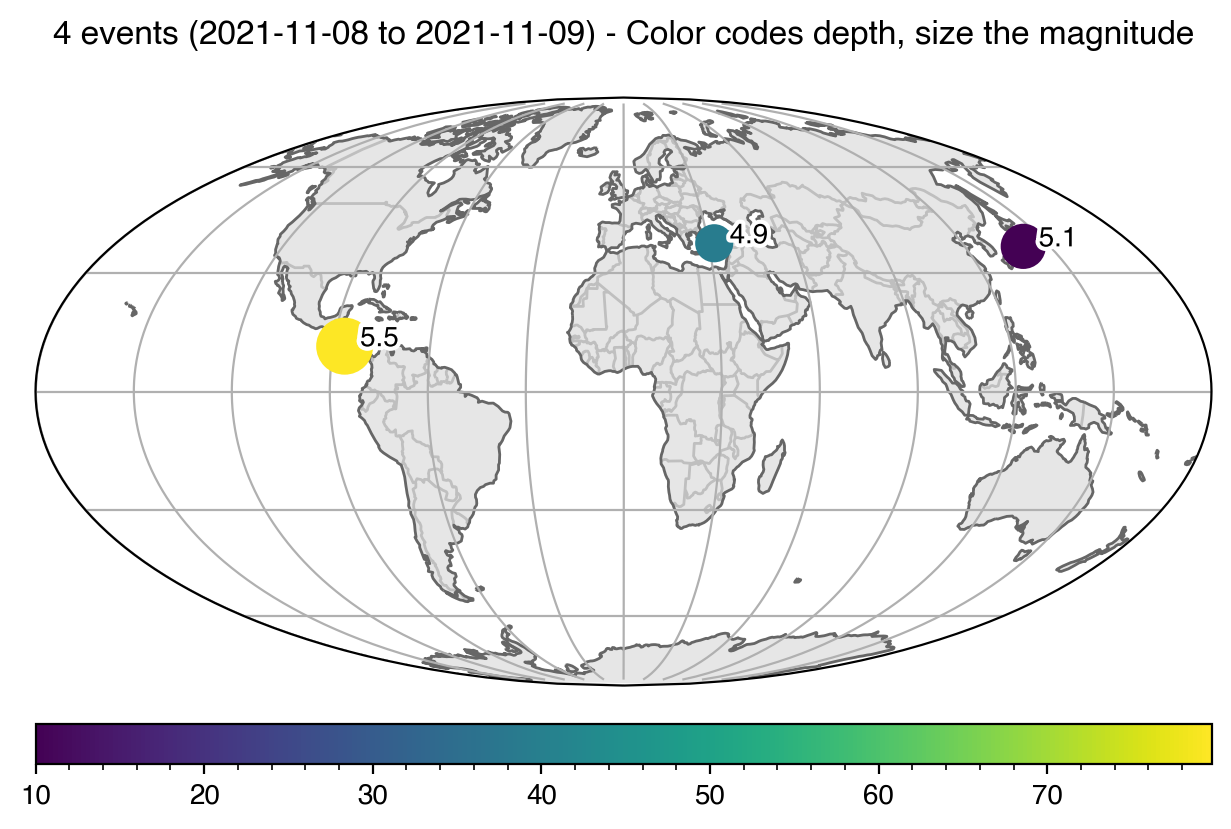

In [3]:
eventClient = Client('ISC')
catalog = eventClient.get_events(
    starttime=UTCDateTime() - 60 * 60 * 24,
    minmagnitude=5,
    orderby='magnitude'
)
catalog.plot();

In [4]:
catalog

4 Event(s) in Catalog:
2021-11-09T06:24:27.470000Z | +11.446,  -86.613 | 4.96 mb
2021-11-09T02:53:56.000000Z | +11.290,  -86.487 | 5.5 mb
2021-11-08T17:43:26.410000Z | +37.869,  +32.068 | 4.86 mb
2021-11-08T16:14:57.700000Z | +37.030, +140.650 | 5.1 mb

In [28]:
event = catalog[1]
event

Event:	2021-11-09T02:53:56.000000Z | +11.290,  -86.487 | 5.5 mb

	          resource_id: ResourceIdentifier(id="smi:ISC/evid=621385042")
	           event_type: 'earthquake'
	 event_type_certainty: 'known'
	  preferred_origin_id: ResourceIdentifier(id="smi:ISC/origid=615936642")
	                 ---------
	   event_descriptions: 1 Elements
	     focal_mechanisms: 1 Elements
	              origins: 1 Elements
	           magnitudes: 6 Elements

In [33]:
from obspy.geodetics import gps2dist_azimuth

s_lon = event.preferred_origin().longitude
s_lat = event.preferred_origin().latitude

r_coords = inventory.get_coordinates('NL.TERZ.00.BHZ')
r_lon = r_coords['longitude']
r_lat = r_coords['latitude']

r, az, baz = gps2dist_azimuth(s_lat, s_lon, r_lat, r_lon)
print(
    f'Distance: {r:.2f} km\n'
    f'Azimuth: {az:.0f}°\n'
    f'Back-azimuth: {baz:.0f}°'
)

t_P = r / 6000 - 60
t_L = r / 3000 + 600

print(
    f'P arrival: ~{t_P:.0f} seconds after origintime\n'
    f'L arrival: ~{t_L:.0f} seconds after origintime'
)

Distance: 9212594.17 km
Azimuth: 40°
Back-azimuth: 279°
P arrival: ~1475 seconds after origintime
L arrival: ~3671 seconds after origintime


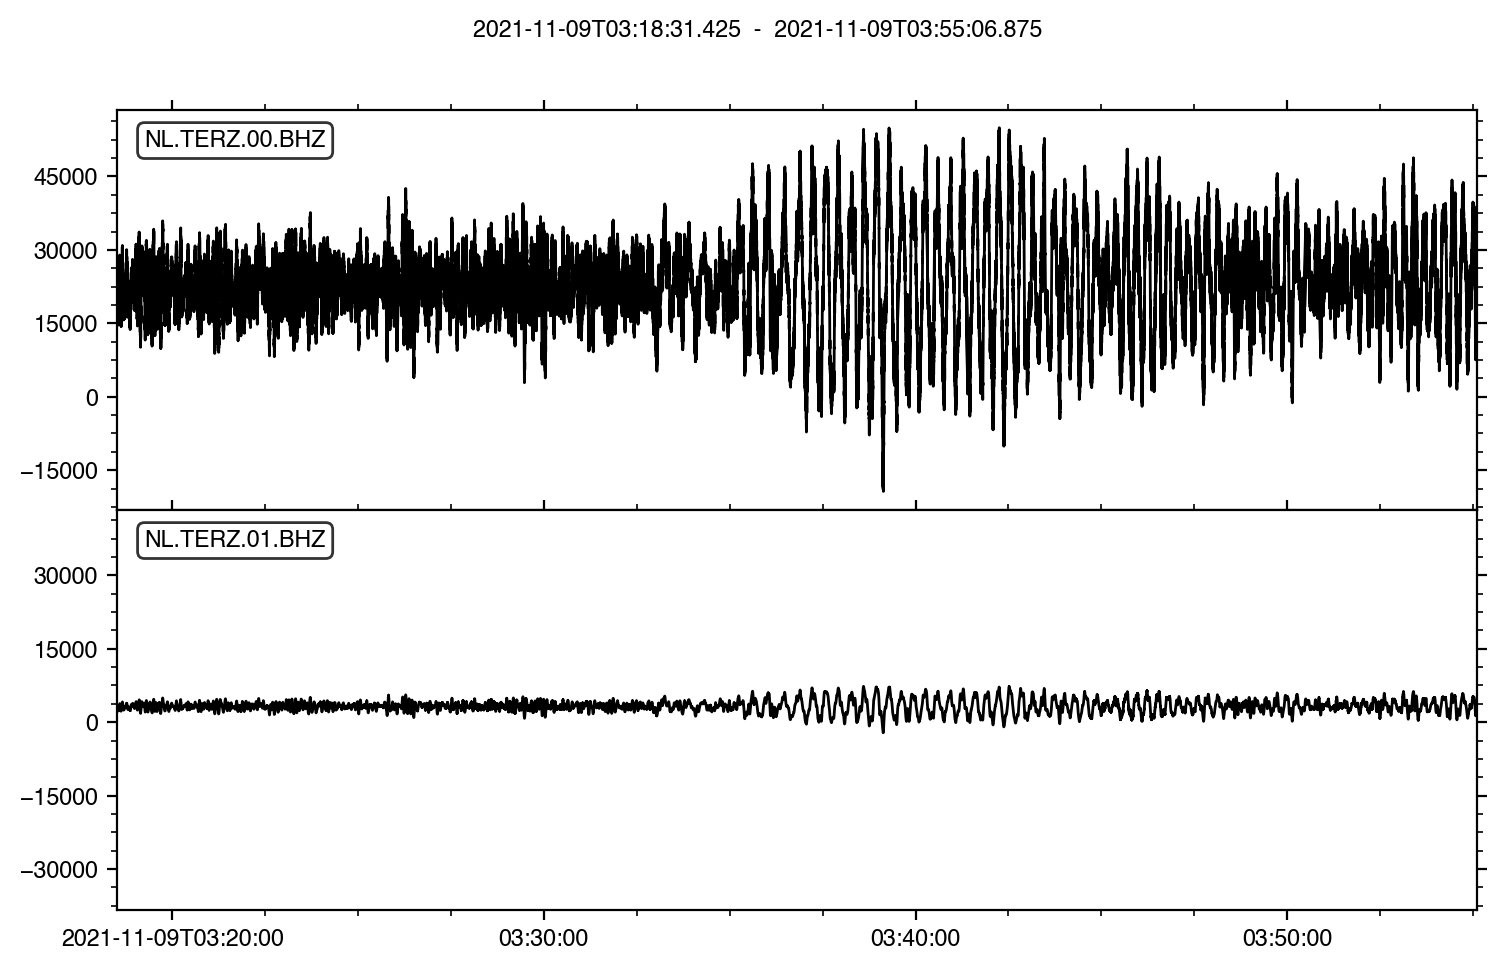

In [34]:
origintime = catalog[1].preferred_origin().time

raw_stream = client.get_waveforms(
    network='NL',
    station='TERZ',
    location='*',
    channel='BHZ',
    starttime=origintime + t_P,
    endtime=origintime + t_L,
)
raw_stream.plot();

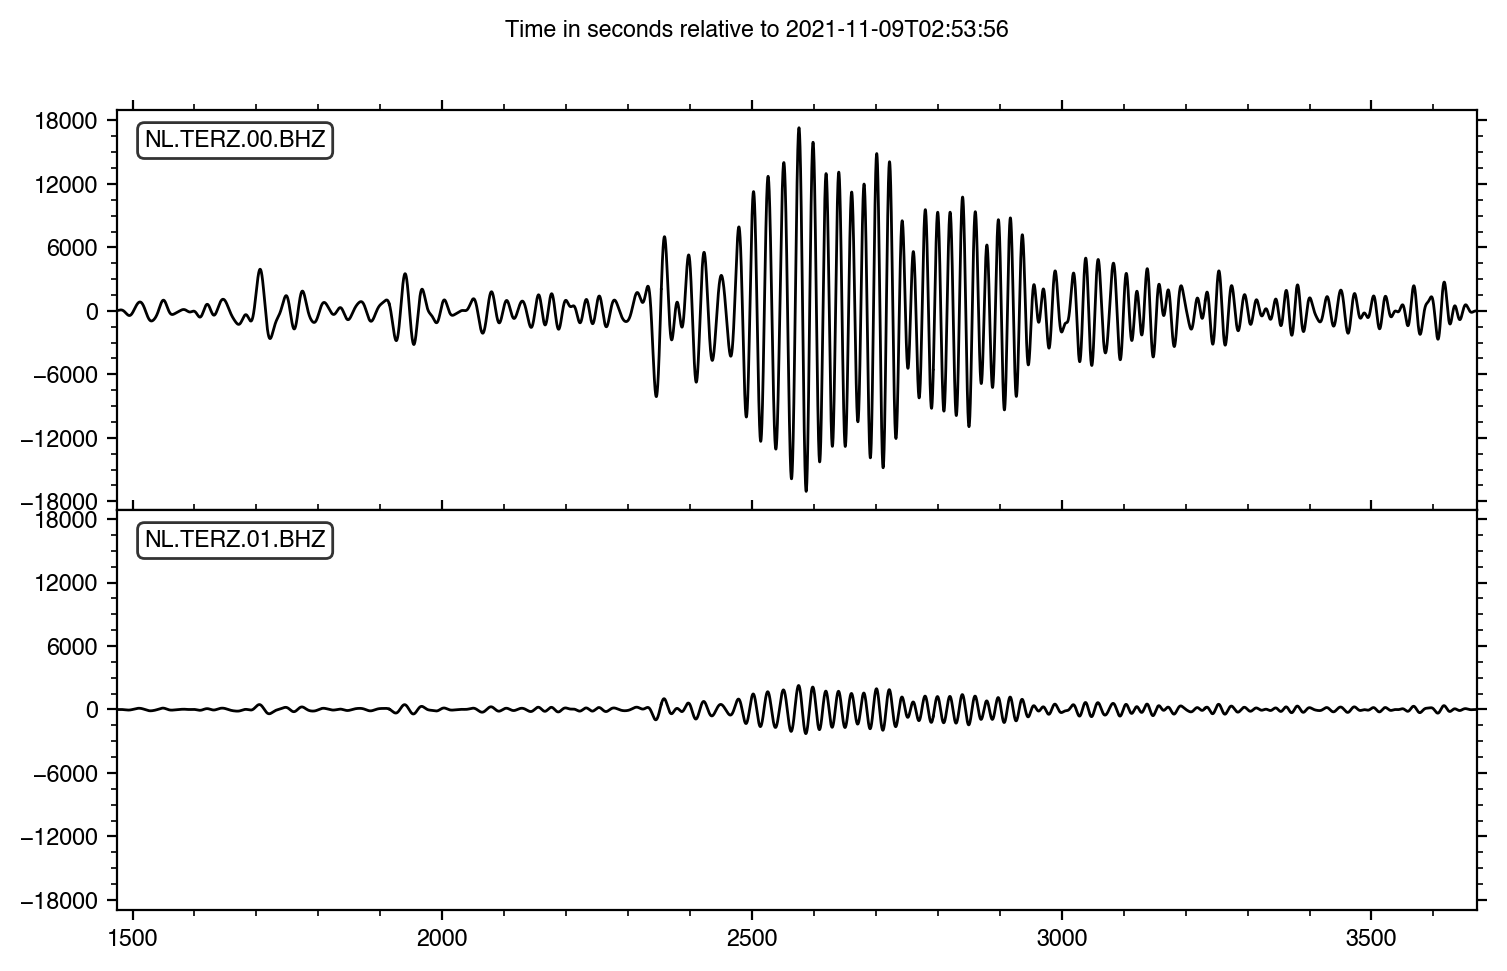

In [35]:
stream = raw_stream.copy()
stream.detrend('demean')
stream.taper(0.05, max_length=60)
stream.filter(
    type='bandpass', freqmin=0.01, freqmax=0.05, corners=4, zerophase=True
)
stream.plot(type='relative', reftime=origintime);

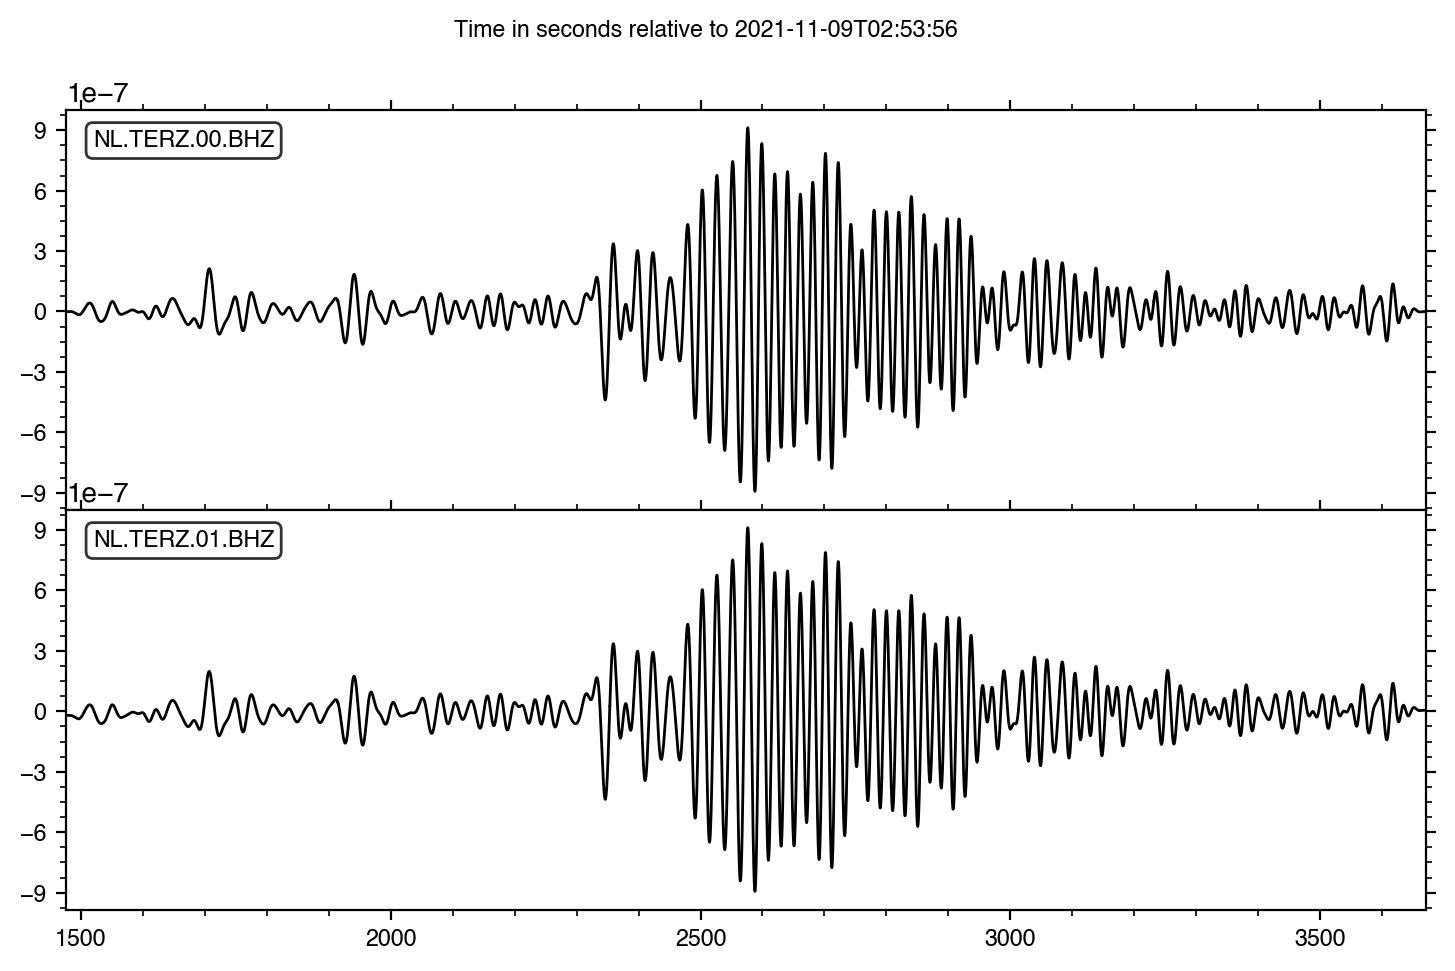

In [36]:
stream.remove_response(inventory)
stream.plot(type='relative', reftime=origintime);

### Multi-dimensional array oriented data (raster files)
(a.k.a. N-dimensional, ND arrays)

![image](assets/ndarray.png)

This can be for instance:
* Longitude, Latitude, Altitude, Temperature, Wz, Wm, Wv, rho, Humidity, ...
* Longitude, Latitude, Depth, Vp, Vs, rho, Qp, Qs
* Station name, Time, PSD, RMS
* CC pair, Time, Lagtime, CCF
* Array name, Time, Frequency, Px, Py, BAZ, Apparent velocity, Coherence

#### NetCDF (most recommended)

[Network Common Data Form (NetCDF)](https://www.unidata.ucar.edu/software/netcdf/) s a set of software libraries and machine-independent data formats that support the creation, access, and sharing of array-oriented scientific data. It is also a community standard for sharing scientific data. The Unidata Program Center supports and maintains netCDF programming interfaces for C, C++, Java, and Fortran. Programming interfaces are also available for Python, IDL, MATLAB, R, Ruby, and Perl.

**Data in netCDF format is:**

* **Self-Describing:** A netCDF file includes information about the data it contains.
* **Portable:** A netCDF file can be accessed by computers with different ways of storing integers, characters, and floating-point numbers.
* **Scalable:** Small subsets of large datasets in various formats may be accessed efficiently through netCDF interfaces, even from remote servers.
* **Appendable:** Data may be appended to a properly structured netCDF file without copying the dataset or redefining its structure.
* **Sharable:** One writer and multiple readers may simultaneously access the same netCDF file.
* **Archivable:** Access to all earlier forms of netCDF data will be supported by current and future versions of the software.

#### GeoTIFF
The [Geographic Tagged Image File Format (GeoTIFF)](https://www.ogc.org/standards/geotiff) format is used throughout the geospatial and earth science communities to share geographic image data. It has no advantages over NetCDF. When there is a choice, use NetCDF!

### Vector files
ShapeFiles, KML/KMZ, STL, etc...

### Examples

#### Topography and Bathymetry

In [2]:
import xarray as xr

ds = xr.open_dataset('Raster/gebco_2021_n41.4_s38.6_w8.0_e10.0.nc')
ds

<xarray.Dataset>
Dimensions:    (lat: 672, lon: 480)
Coordinates:
  * lat        (lat) float64 38.6 38.61 38.61 38.61 ... 41.39 41.39 41.39 41.4
  * lon        (lon) float64 8.002 8.006 8.01 8.015 ... 9.985 9.99 9.994 9.998
Data variables:
    elevation  (lat, lon) int16 ...
Attributes: (12/36)
    title:                           The GEBCO_2021 Grid - a continuous terra...
    summary:                         The GEBCO_2021 Grid is a continuous, glo...
    keywords:                        BATHYMETRY/SEAFLOOR TOPOGRAPHY, DIGITAL ...
    Conventions:                     CF-1.6, ACDD-1.3
    id:                              DOI: 10.5285/c6612cbe-50b3-0cff-e053-6c8...
    naming_authority:                https://dx.doi.org
    ...                              ...
    geospatial_vertical_units:       meters
    geospatial_vertical_resolution:  1.0
    geospatial_vertical_positive:    up
    identifier_product_doi:          DOI: 10.5285/c6612cbe-50b3-0cff-e053-6c8...
    references:                      DOI: 10.5285/c6612cbe-50b3-0cff-e053-6c8...
    node_offset:                     1.0

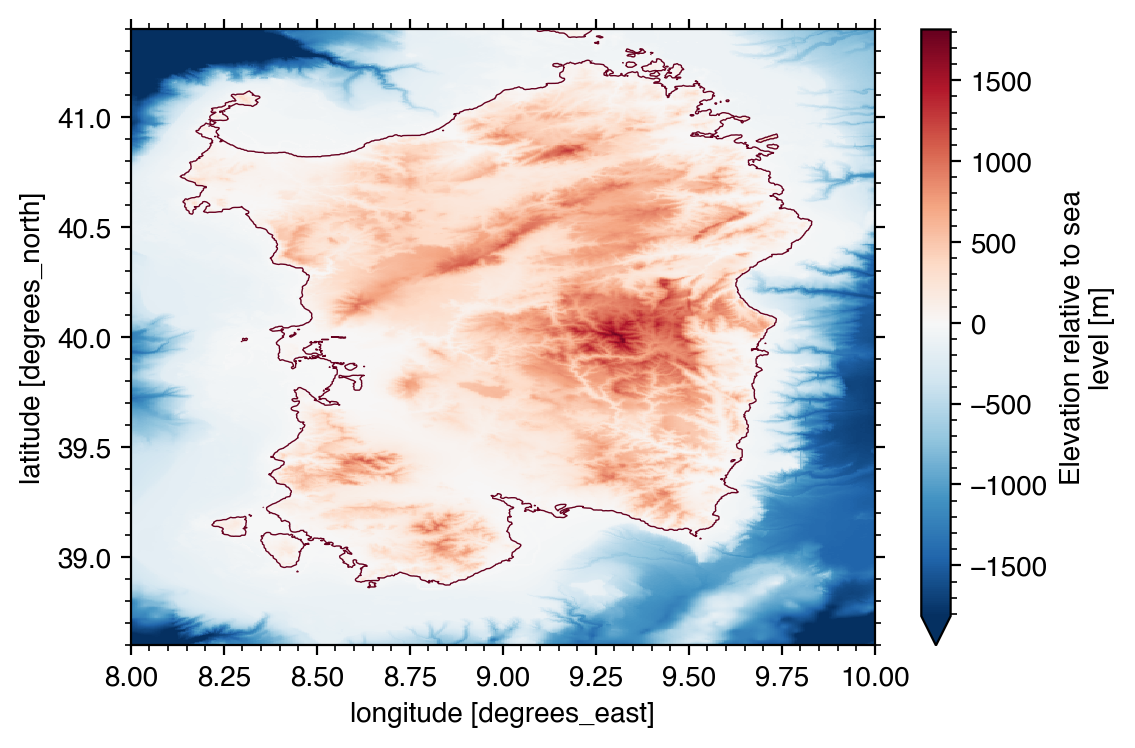

In [33]:
ds.elevation.plot(robust=True)
ds.elevation.plot.contour(levels=[0], linewidths=0.5)

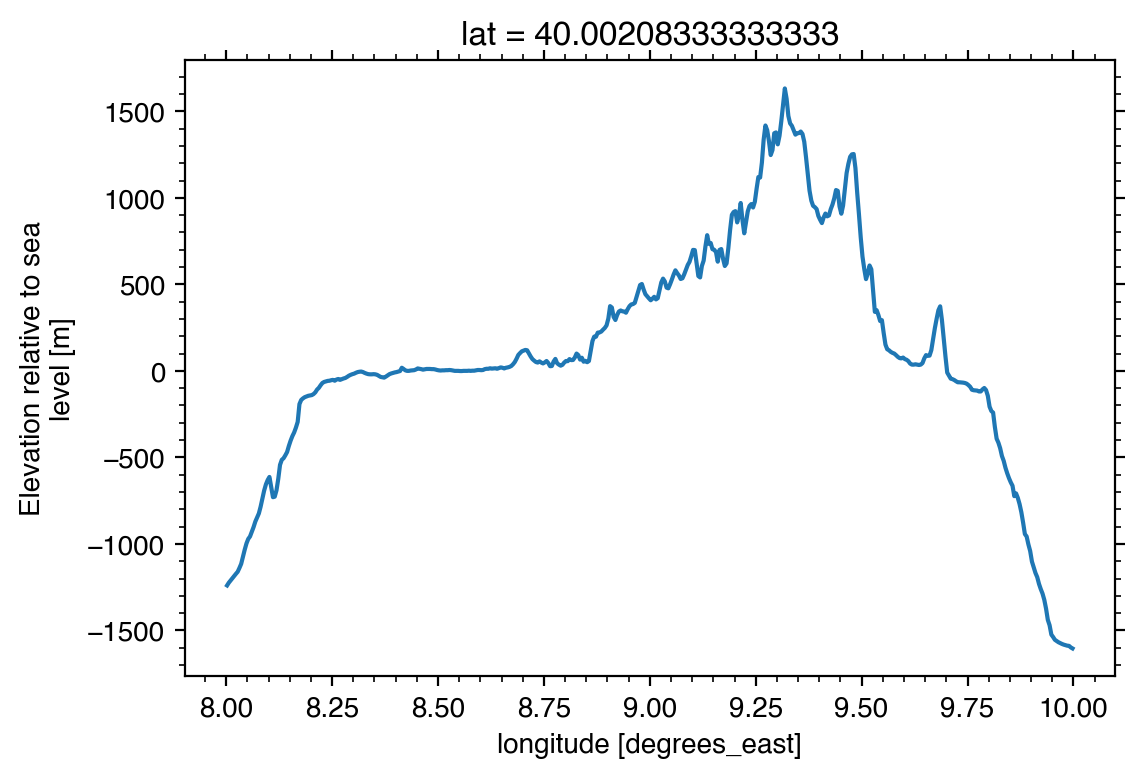

In [12]:
ds.sel(lat=40, method='nearest').elevation.plot()

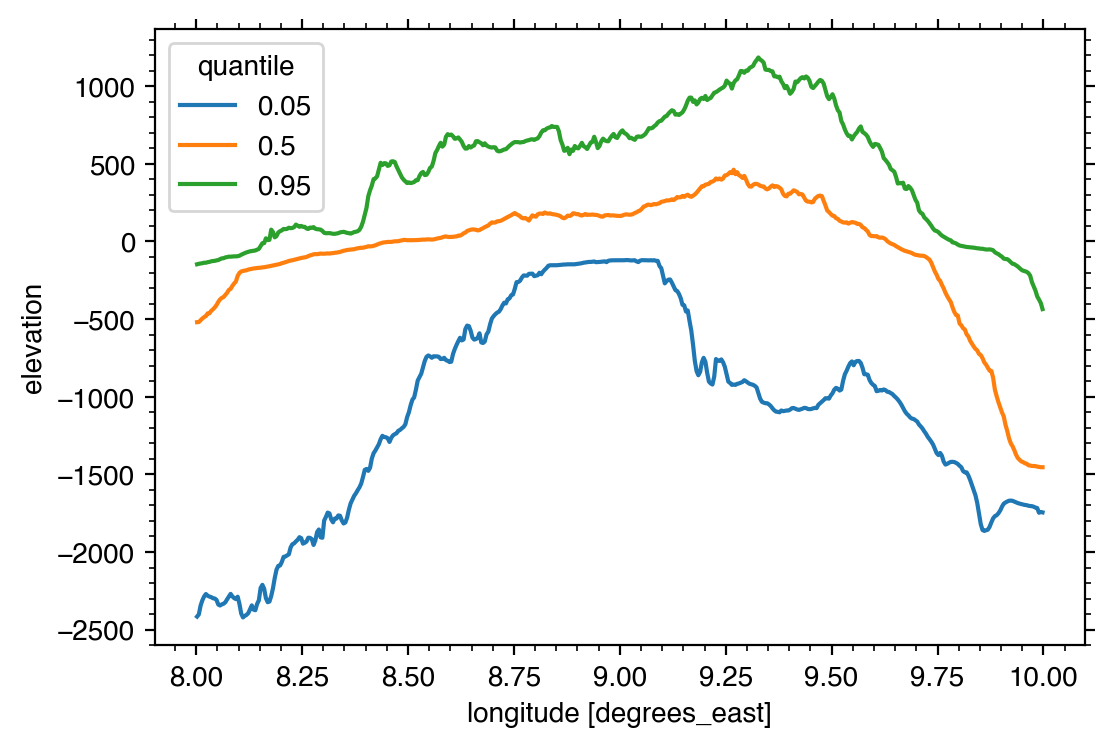

In [20]:
ds.elevation.quantile(q=[0.05, 0.5, 0.95], dim='lat').plot.line(x='lon')

(array([  2246.,   4036.,  12847.,  17940.,  22919.,  98879., 114175.,
         41871.,   7212.,    435.]),
 array([-2732. , -2282.6, -1833.2, -1383.8,  -934.4,  -485. ,   -35.6,
          413.8,   863.2,  1312.6,  1762. ]),
 <BarContainer object of 10 artists>)

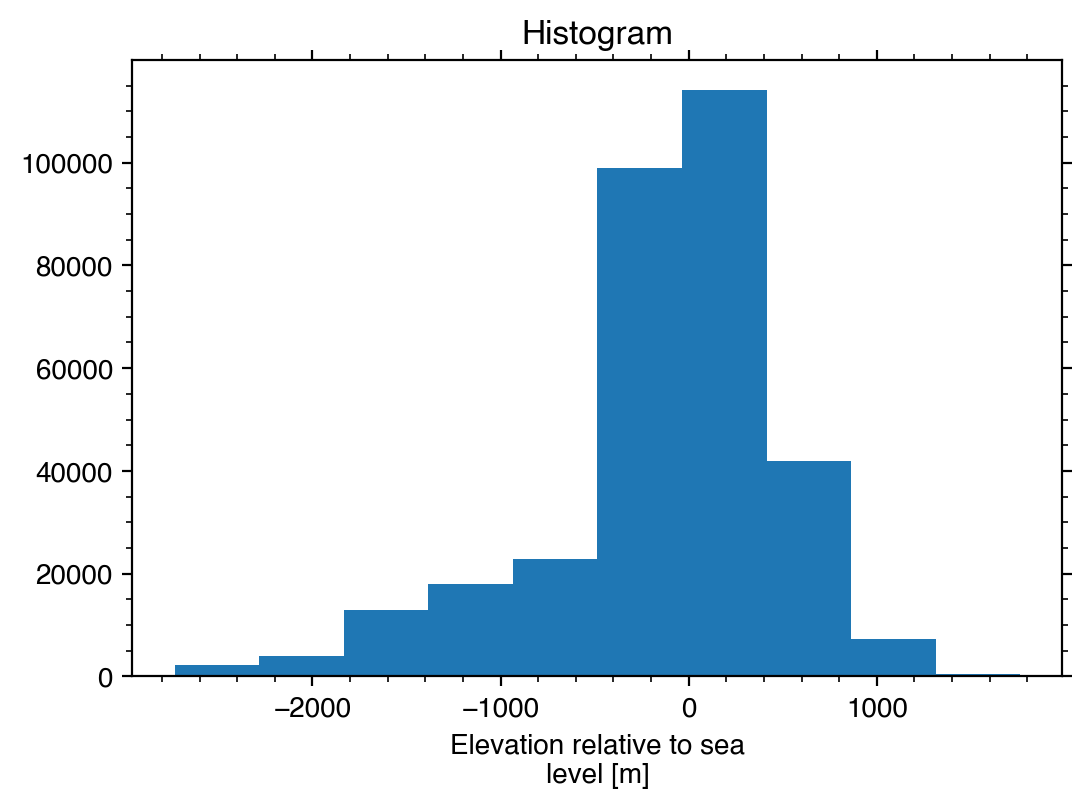

In [22]:
ds.elevation.plot.hist()

/Users/shahar/dev/cartopy/lib/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


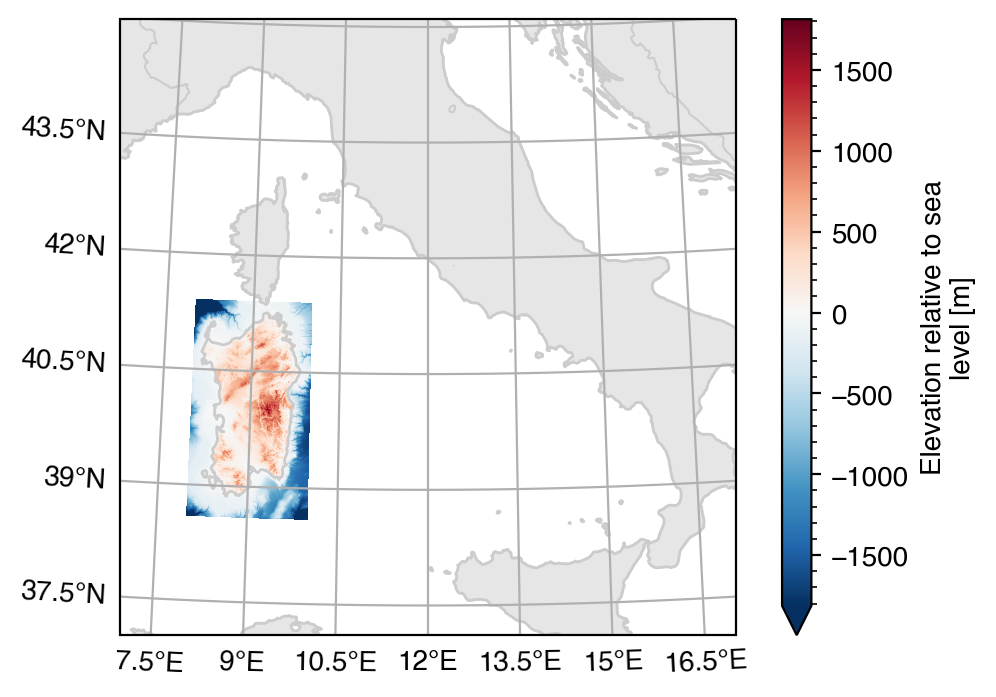

In [54]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

w, e, s, n = extent = (7, 17, 37, 45)

p = ds.elevation.plot(
    robust=True,
    subplot_kws=dict(
        projection=ccrs.Orthographic(0.5 * (w + e), 0.5 * (s + n))),
    transform=ccrs.PlateCarree(),
 )

p.axes.set_extent(extent)

p.axes.coastlines(color='0.8')
p.axes.add_feature(cfeature.LAND, color='0.9')
gl = p.axes.gridlines(draw_labels=True)
gl.right_labels = False
gl.top_labels = False

#### PPSD

In [6]:
from seistools import spectral
from cmaptools import extend_cmap
import xarray as xr

psd = xr.open_dataarray('Raster/NL.TERZ.00.BHZ_PSD.nc')
psd.attrs['starttime'] = spectral._to_datetime(psd.starttime)
psd.attrs['endtime'] = spectral._to_datetime(psd.endtime)
psd

<xarray.DataArray 'PSD' (time: 3551, frequency: 509)>
[1807459 values with dtype=float32]
Coordinates:
  * frequency  (frequency) float64 0.1172 0.1562 0.1953 ... 19.88 19.92 19.96
  * time       (time) datetime64[ns] 2020-12-14T00:15:00 ... 2021-01-19T23:45:00
Attributes: (12/15)
    long_name:      Power Spectral Density
    units:          m²/s⁴/Hz, dB
    description:    Power Spectral Density computed using scipy.signal.welch.
    seedid:         NL.TERZ.00.BHZ
    wlen:           1800
    overlap:        0.5
    ...             ...
    noverlap:       512
    sampling_rate:  40.0
    starttime:      2020-12-14 00:00:00+00:00
    endtime:        2021-01-20 00:00:00+00:00
    title:          NL.TERZ.00.BHZ 2020-12-14 -> 2021-01-20 (3551 segments)\n...
    availability:   ,sampling_rate,start_time,end_time,gaps\nNL.TERZ.00.BHZ,4...

<AxesSubplot:title={'center':'NL.TERZ.00.BHZ 2020-12-14 -> 2021-01-20 (3551 segments)\nWindow length: 1800 s, Overlap: 50.0%'}, xlabel='Frequency, Hz', ylabel='Power Spectral Density, m²/s⁴/Hz, dB'>

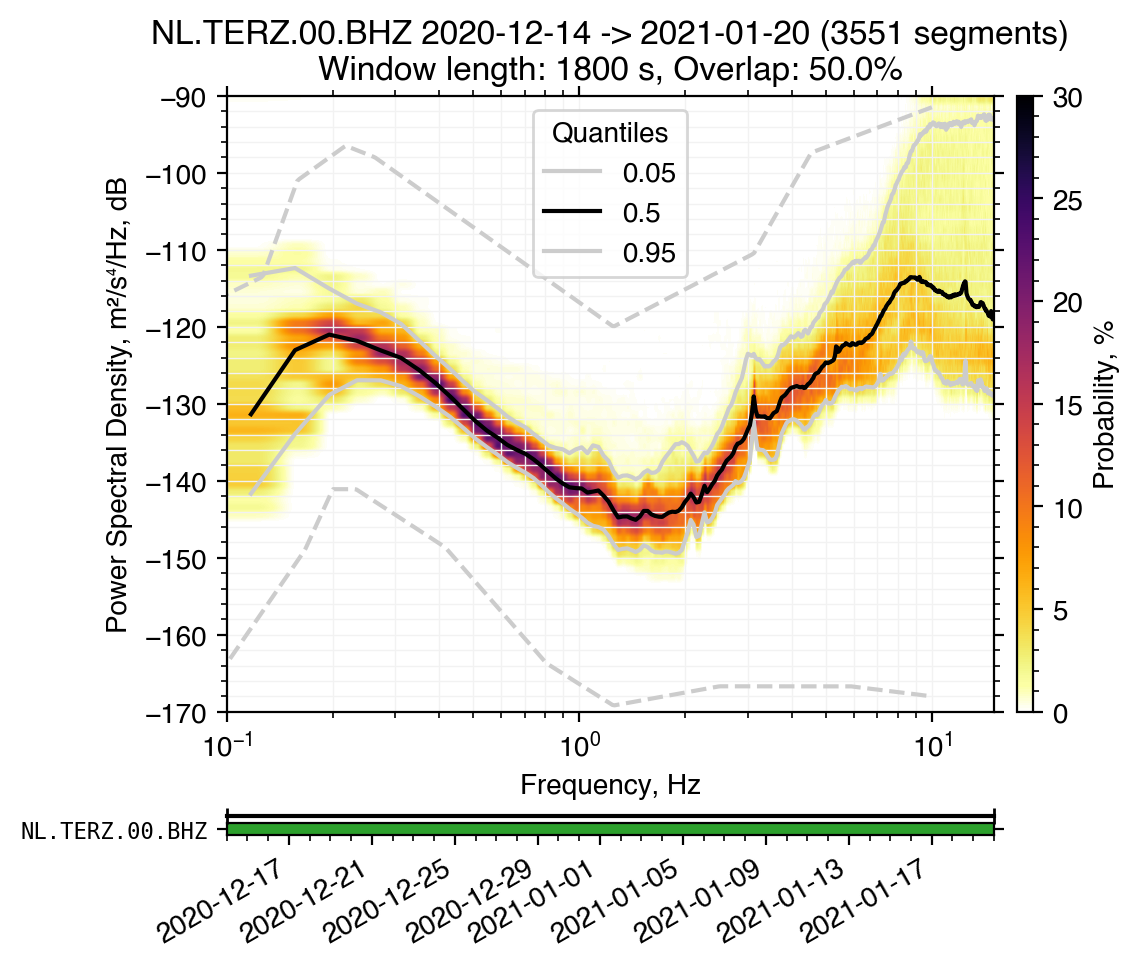

In [5]:
cmap = extend_cmap('inferno_r', 'w')

psd.plot_ppsd(
    dB_bins=(-170, -90, 1),
    fmin=0.1,
    fmax=15,
    smooth_octave=False,
    quantiles=[0.05, 0.5, 0.95],
    quantiles_kwargs=dict(c=['0.8', 'k', '0.8']),
    cmap=cmap
)

<AxesSubplot:title={'center':'NL.TERZ.00.BHZ 2020-12-14 -> 2021-01-20 (3551 segments)\nWindow length: 1800 s, Overlap: 50.0%'}, ylabel='Frequency, Hz'>

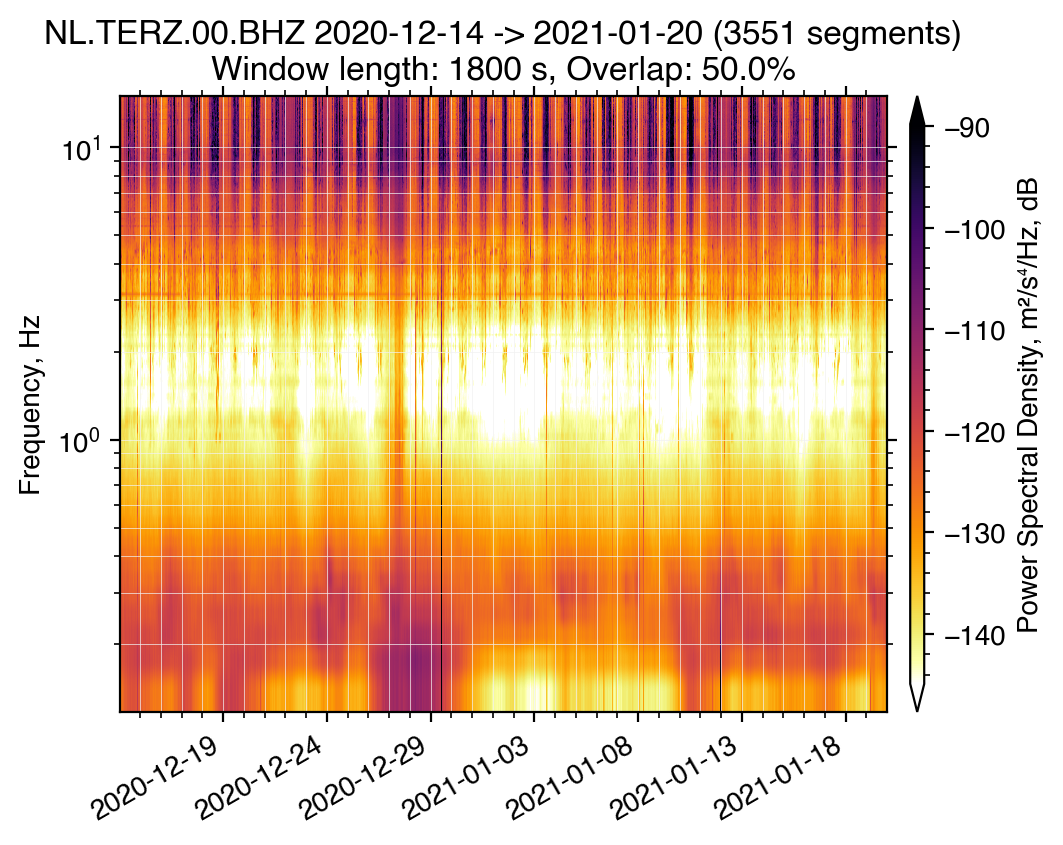

In [132]:
vmin, vmax = psd.quantile([0.02, 0.98])
psd.plot_spectrogram(fmin=0.1, fmax=15, cmap=cmap, vmin=vmin, vmax=vmax)

In [12]:
psd.sel(frequency=slice(2.9, 3.4))

<xarray.DataArray 'PSD' (time: 3551, frequency: 13)>
array([[-139.1311 , -138.41068, -137.46524, ..., -134.48813, -134.81013,
        -134.59923],
       [-137.80615, -137.0549 , -136.67899, ..., -134.36897, -134.4753 ,
        -134.138  ],
       [-137.06802, -136.47066, -136.47314, ..., -133.20879, -133.05177,
        -133.34923],
       ..., 
       [-134.05101, -133.78488, -133.73611, ..., -133.6286 , -133.02846,
        -133.80087],
       [-134.94241, -134.86914, -134.73494, ..., -133.28809, -133.04936,
        -133.68925],
       [-135.4256 , -134.90323, -134.227  , ..., -133.2488 , -133.36665,
        -133.50905]], dtype=float32)
Coordinates:
  * frequency  (frequency) float64 2.93 2.969 3.008 3.047 ... 3.32 3.359 3.398
  * time       (time) datetime64[ns] 2020-12-14T00:15:00 ... 2021-01-19T23:45:00
Attributes: (12/15)
    long_name:      Power Spectral Density
    units:          m²/s⁴/Hz, dB
    description:    Power Spectral Density computed using scipy.signal.welch.
    seedid:         NL.TERZ.00.BHZ
    wlen:           1800
    overlap:        0.5
    ...             ...
    noverlap:       512
    sampling_rate:  40.0
    starttime:      2020-12-14 00:00:00+00:00
    endtime:        2021-01-20 00:00:00+00:00
    title:          NL.TERZ.00.BHZ 2020-12-14 -> 2021-01-20 (3551 segments)\n...
    availability:   ,sampling_rate,start_time,end_time,gaps\nNL.TERZ.00.BHZ,4...